# FRACTURE CLASSIFICATION

In [1]:
#1 reading the data
#2 converting into gray scale
#3 resizing the image
#4 writing into a different path

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
files=os.listdir("F:\Project\miniproject1ipcv\FracAtlas\images\Fractured")
#print(files)
print(len(files))

717


(227, 227)

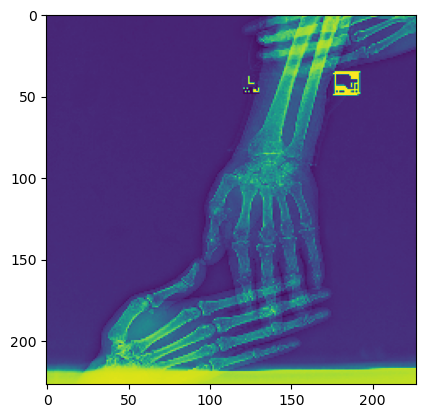

In [7]:
#reading a single image
img=cv2.imread("F:\Project\miniproject1ipcv\FracAtlas\images\Fractured\IMG0000019.jpg")
resize=cv2.resize(img,(227,227))
gray=cv2.cvtColor(resize,cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
gray.shape

(224, 224, 3)

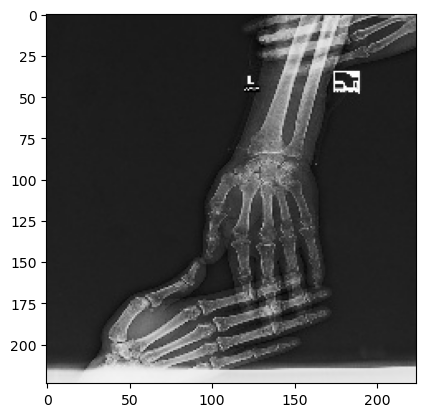

In [4]:
img=cv2.imread("F:\\Project\\fracture_classification\\resizefracture\\img1.jpg")
plt.imshow(img)
#cv2.imwrite("F:\eg\img1.jpg",img)
img.shape

In [4]:
#print(os.path.join("F:\Project\miniproject1ipcv\FracAtlas\images\Fractured","IMG0000019.jpg"))

F:\Project\miniproject1ipcv\FracAtlas\images\Fractured\IMG0000019.jpg


### writing the resized  fractured img after reading it

In [10]:
count=0
for file in files:
    img=cv2.imread(os.path.join("F:\Project\miniproject1ipcv\FracAtlas\images\Fractured",file))
    #plt.imshow(img)
    if img is None:
        print("Error: Image not found.")
        exit()
    else:
        count+=1
    name="img"+str(count)+".jpg"
    #print("name:",name)
    resize=cv2.resize(img,(224,224))
    cv2.imwrite(os.path.join("F:\\Project\\fracture_classification\\resizefracture",name),resize) 
print(count)

717


### writing the resized non fractured image

In [11]:
files=os.listdir("F:\\Project\\miniproject1ipcv\\FracAtlas\\images\\Nofractured")

In [12]:
count=0
for file in files:
    img=cv2.imread(os.path.join("F:\\Project\\miniproject1ipcv\\FracAtlas\\images\\Nofractured",file))
    if img is None:
        print("Error: Image not found.")
        exit()
    else:
        count+=1
    name="image"+str(count)+".jpg"
    #print("name:",name)
    resize=cv2.resize(img,(224,224))
    cv2.imwrite(os.path.join("F:\\Project\\fracture_classification\\resize_nonfractured",name),resize) 
print(count)

3366


### creating a dataframe consisting of a column consisting of features 1 img name and 2nd col for label indicating fracture or not

#### FRACTURE DATA INTO DATAFRAME

In [13]:
temp=os.listdir("F:\\Project\\fracture_classification\\resizefracture")

In [14]:
data=[]
for file in temp:
    feature=cv2.imread(os.path.join("F:\\Project\\fracture_classification\\resizefracture",file))
    data.append(feature)

(224, 224, 3)


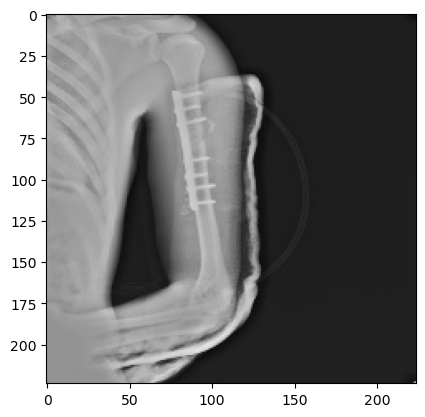

In [16]:
import random
s=random.choice(temp)
pic=cv2.imread(os.path.join("F:\\Project\\fracture_classification\\resizefracture",s))
plt.imshow(pic)
print(pic.shape)

#### NON FRACTURE DATA INTO DATAFRAME

In [18]:
# not fractured 0

In [17]:
temp2=os.listdir("F:\\Project\\fracture_classification\\resize_nonfractured")
for i in range(len(temp2)):
    feature=cv2.imread(os.path.join("F:\\Project\\fracture_classification\\resize_nonfractured",temp2[i]))
    data.append(feature)

### X...Y

In [23]:
x=np.array(data)
x.shape

(4083, 224, 224, 3)

In [24]:
label=[]
for img in temp:#fracture-1
    label.append(1)
for img in temp2:#non fracture -0
    label.append(0)

In [26]:
y=np.array(label)
y.shape

(4083,)

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [28]:
#normalization
x_trainS = (x_train - x_train.min())/(x_train.max() - x_train.min())
x_testS = (x_test - x_test.min())/(x_test.max() - x_test.min())

In [29]:
from keras.utils import to_categorical
y_trainE = to_categorical(y_train)
y_testE = to_categorical(y_test)

In [34]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

In [35]:
input_shape = (224,224, 3)
classes = 2
vgg16 = VGG16(weights='imagenet', input_shape=input_shape, classes=classes, include_top=False)
for layer in vgg16.layers:
    layer.trainable = False
x = Flatten()(vgg16.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(classes, activation='softmax')(x)
model = Model(inputs=vgg16.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 21,137,986 (80.64 MB)

 Trainable params: 6,423,298 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [38]:
model.fit(x_trainS, y_trainE, batch_size=30, epochs=10)

Epoch 1/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 233s 2s/step - accuracy: 0.7618 - loss: 1.6482
Epoch 2/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 249s 2s/step - accuracy: 0.8288 - loss: 0.3904
Epoch 3/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 247s 2s/step - accuracy: 0.8407 - loss: 0.3580
Epoch 4/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 249s 2s/step - accuracy: 0.8320 - loss: 0.3655
Epoch 5/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 248s 2s/step - accuracy: 0.8581 - loss: 0.3407
Epoch 6/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 248s 2s/step - accuracy: 0.8548 - loss: 0.3262
Epoch 7/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 248s 2s/step - accuracy: 0.8605 - loss: 0.3177
Epoch 8/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 248s 2s/step - accuracy: 0.8699 - loss: 0.2971
Epoch 9/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 249s 2s/step - accuracy: 0.8740 - loss: 0.2870
Epoch 10/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 252s 2s/step - accuracy: 0.8686 - loss: 0.3128


In [80]:
!pip install pydot

Defaulting to user installation because normal site-packages is not writeable


In [84]:
pip install graphviz

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   -------------------------- ------------- 30.7/47.1 kB 640.0 kB/s eta 0:00:01
   ---------------------------------------- 47.1/47.1 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [85]:
from tensorflow.keras.utils import plot_model
plot_model(model)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [40]:
y_pred=model.predict(x_testS)

26/26 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step


In [49]:
print(y_pred)

[[0.9908268  0.00917318]
 [0.97657335 0.02342658]
 [0.814461   0.185539  ]
 ...
 [0.5375654  0.4624346 ]
 [0.98372656 0.01627344]
 [0.7988612  0.20113885]]


In [62]:
print(len(y_testE))

817


In [50]:
print(len(y_pred))

817


In [53]:
pred_class=[]
for x in y_pred:
    pred_class.append(np.argmax(x))
predicted_class = np.array(pred_class)

In [64]:
test=[]
for x in y_testE:
    test.append(np.argmax(x))
correct_class=np.array(test)

In [57]:
print(y_testE[0])

[1. 0.]


In [59]:
print(y_pred[0])

[0.9908268  0.00917318]


In [41]:
from sklearn.metrics import accuracy_score

In [65]:
print(accuracy_score(correct_class,predicted_class))

0.8665850673194615
